<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

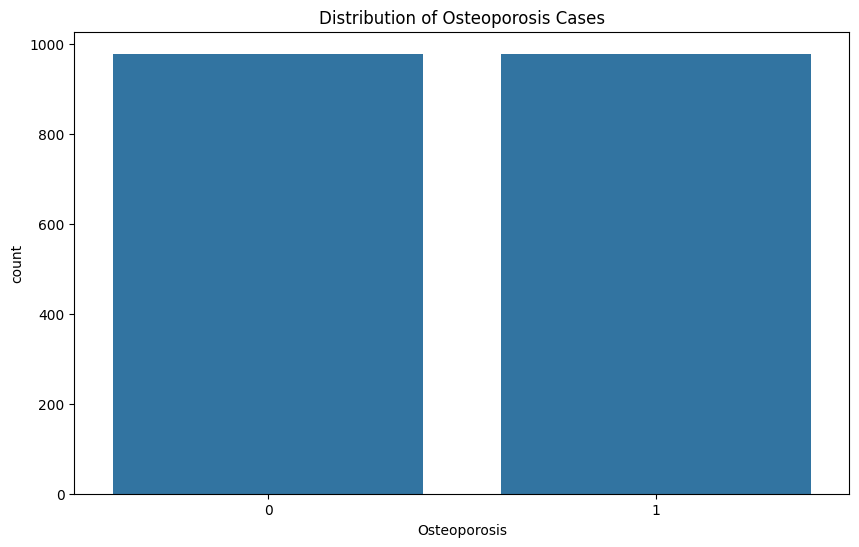

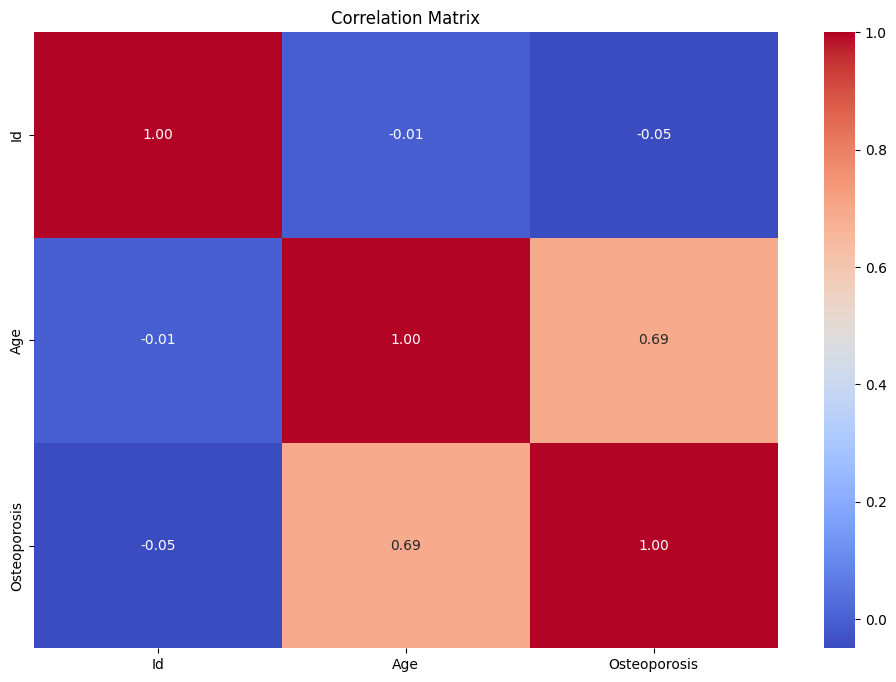

Please enter the following details:


In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import joblib

# Load the dataset
data = pd.read_csv('/content/osteoporosis.csv')
# Display basic information
print(data.info())
print(data.describe())


# Visualizations
plt.figure(figsize=(10, 6))
sns.countplot(x='Osteoporosis', data=data)
plt.title('Distribution of Osteoporosis Cases')
plt.show()

# Correlation matrix - Select only numeric columns
plt.figure(figsize=(12, 8))
numeric_data = data.select_dtypes(include=np.number)  # Select numeric columns
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)

# Convert categorical columns to numerical using one-hot encoding
categorical_cols = ['Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
                    'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
                    'Physical Activity', 'Smoking', 'Alcohol Consumption',
                    'Medical Conditions', 'Medications', 'Prior Fractures']

data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Prepare data for modeling
X = data.drop(['Id', 'Osteoporosis'], axis=1)  # Drop non-feature columns
y = data['Osteoporosis']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Data reduction (optional)
pca = PCA(n_components=0.95)  # Adjust based on variance explained
X_reduced = pca.fit_transform(X_scaled)



# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Convert y_train and y_test to numeric type (int or float) before training and evaluating the model
# This line addresses the error by converting the target variable to a standard numeric type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the model and preprocessing objects
joblib.dump(model, 'osteoporosis_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(imputer, 'imputer.pkl')
joblib.dump(pca, 'pca.pkl')

# Function to predict osteoporosis risk based on user input
def predict_osteoporosis():
    print("Please enter the following details:")

    # Collecting user input
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    hormonal_changes = input("Hormonal Changes (Yes/No): ")
    family_history = input("Family History (Yes/No): ")
    race = input("Race/Ethnicity: ")
    body_weight = input("Body Weight: ")
    calcium_intake = input("Calcium Intake: ")
    vitamin_d_intake = input("Vitamin D Intake: ")
    physical_activity = input("Physical Activity (Yes/No): ")
    smoking = input("Smoking (Yes/No): ")
    alcohol_consumption = input("Alcohol Consumption (Yes/No): ")
    medical_conditions = input("Medical Conditions (Comma separated): ")
    medications = input("Medications (Comma separated): ")
    prior_fractures = input("Prior Fractures (Yes/No): ")

    # Creating a DataFrame for the new input
    # Include 'Id' and 'Osteoporosis' with dummy values
    new_data = pd.DataFrame({
        'Id': [0],  # Dummy value for 'Id'
        'Age': [age],
        'Gender': [gender],
        'Hormonal Changes': [hormonal_changes],
        'Family History': [family_history],
        'Race/Ethnicity': [race],
        'Body Weight': [body_weight],
        'Calcium Intake': [calcium_intake],
        'Vitamin D Intake': [vitamin_d_intake],
        'Physical Activity': [physical_activity],
        'Smoking': [smoking],
        'Alcohol Consumption': [alcohol_consumption],
        'Medical Conditions': [medical_conditions],
        'Medications': [medications],
        'Prior Fractures': [prior_fractures],
        'Osteoporosis': [0]  # Dummy value for 'Osteoporosis'
    })

    # Preprocess the input data
    new_data_imputed = imputer.transform(new_data)
    # Convert back to DataFrame to ensure columns are preserved
    new_data_imputed = pd.DataFrame(new_data_imputed, columns=new_data.columns)
    new_data_encoded = pd.get_dummies(new_data_imputed, columns=categorical_cols, drop_first=True)

    # Align columns to match the training data
    new_data_encoded = new_data_encoded.reindex(columns=X.columns, fill_value=0)

    # ... (rest of your code remains the same) ...
    # Scale and reduce dimensions
    new_data_scaled = scaler.transform(new_data_encoded)
    new_data_reduced = pca.transform(new_data_scaled)

    # Make a prediction
    prediction = model.predict(new_data_reduced)

    if prediction[0] == 1:
        print("The model predicts: High risk of osteoporosis.")
    else:
        print("The model predicts: Low risk of osteoporosis.")

# Call the function
predict_osteoporosis()

In [ ]:
# -*- coding: utf-8 -*-
"""defaulter.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1Lw_kXM4pFTql6aLFL4IHFb_Qz39HQtz6
"""

# Importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the dataset
data = pd.read_csv('/content/loan_approval_dataset.csv')

# Preprocess the data
# Handling missing values (if any)
data.fillna(method='ffill', inplace=True)

data.head()

# Drop loan_id (not useful for prediction)
data = data.drop('loan_id', axis=1)

# Handle missing values (fill forward or with median/mean depending on the feature)
data.fillna(method='ffill', inplace=True)  # Or handle missing values differently if needed

# Encoding categorical variables
le = LabelEncoder()

print(data.columns)

# Strip leading/trailing spaces from column names
data.columns = data.columns.str.strip()

# Now you can proceed with your code
le = LabelEncoder()
data['education'] = le.fit_transform(data['education'])
data['self_employed'] = le.fit_transform(data['self_employed'])

# Encode target variable 'loan_status'
data['loan_status'] = le.fit_transform(data['loan_status'])

# Features (X) and Target (y)
X = data.drop('loan_status', axis=1)
y = data['loan_status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling (especially for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate Logistic Regression
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_lr))

# 2. Decision Tree Model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)  # No scaling needed for Decision Tree
y_pred_dt = dt_model.predict(X_test)

# Evaluate Decision Tree
print("\nDecision Tree Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_dt))

# prompt: visualize the statistics

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already created and preprocessed as in the previous code

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

# Visualize the relationship between 'loan_status' and 'education'
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Loan Status vs. Education')
plt.show()


# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Example: Visualize the distribution of 'applicantincome'
plt.figure(figsize=(8, 6))
sns.histplot(data['applicantincome'], kde=True)
plt.title('Distribution of Applicant Income')
plt.show()

# Box plots to visualize the relationship between numerical features and the target variable.
numerical_features = ['applicantincome', 'coapplicantincome', 'loanamount']
for col in numerical_features:
  plt.figure(figsize=(8,6))
  sns.boxplot(x='loan_status', y=col, data=data)
  plt.title(f'Box Plot of {col} by Loan Status')
  plt.show()

# Confusion Matrix visualization (for Logistic Regression)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


# You can create similar visualizations for the Decision Tree model.

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' DataFrame is already created and preprocessed

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=data)
plt.title('Distribution of Loan Status')
plt.show()

# Visualize the relationship between 'loan_status' and 'education'
plt.figure(figsize=(8, 6))
sns.countplot(x='education', hue='loan_status', data=data)
plt.title('Loan Status vs. Education')
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

# Example: Visualize the distribution of 'income_annum'
plt.figure(figsize=(8, 6))
sns.histplot(data['income_annum'], kde=True)
plt.title('Distribution of Applicant Income (Annum)')
plt.show()


# Confusion Matrix visualization (for Logistic Regression)
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()

# Box plots to visualize the relationship between numerical features and the target variable
numerical_features = ['income_annum', 'loan_amount', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='loan_status', y=col, data=data)
    plt.title(f'Box Plot of {col} by Loan Status')
    plt.show()